# Raichle1983 for Twilite and Image-Derived Input Functions

## Setup

In [1]:
import os
import sys
import numpy as np
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))


In [2]:
# system functions that are always useful to have
import time, sys, os
from pprint import pprint

from Raichle1983Context import Raichle1983Context
%matplotlib inline
# from matplotlib import pyplot as plt

In [3]:
# everything is decay corrected
kerndir = os.path.join(os.getenv("HOME"), "PycharmProjects", "dynesty", "idif2025", "data", "kernels")
kern = os.path.join(kerndir, "kernel_hct=46.8.nii.gz")

hodir = os.path.join(os.getenv("HOME"), "PycharmProjects", "dynesty", "idif2025", "data", "ses-20210421152358", "pet")
idif = os.path.join(hodir, "sub-108293_ses-20210421152358_trc-ho_proc-MipIdif_idif_dynesty-Boxcar-ideal.nii.gz")
twil = os.path.join(hodir, "sub-108293_ses-20210421152358_trc-ho_proc-TwiliteKit-do-make-input-func-nomodel_inputfunc_dynesty-RadialArtery-ideal.nii.gz")
pet = os.path.join(hodir, "sub-108293_ses-20210421152358_trc-ho_proc-delay0-BrainMoCo2-createNiftiMovingAvgFrames-ParcSchaeffer-reshape-to-schaeffer-schaeffer.nii.gz")

data_dict_idif = {
    "input_func_fqfn": idif,
    "tissue_fqfn": pet,
    "nlive": 1000,
    "tag": "playground_Raichle1983_idif"
}
data_dict_twil = {
    "kernel_fqfn": kern,
    "input_func_fqfn": twil,
    "tissue_fqfn": pet,
    "nlive": 1000,
    "tag": "playground_Raichle1983_twil"
}

truth_idif = [0.00540336, 0.60403065, 0.01426276, 0.98704998, 0.0155661]
truth_twil = [6.73299667e-03, 8.18760821e-01, 1.07438874e-02, 1.17864186e+01, 2.07295783e-02]
mm_idif = Raichle1983Context(data_dict_idif)
mm_twil = Raichle1983Context(data_dict_twil)

parc_index = 25

## Inspect Raichle1983Context twil

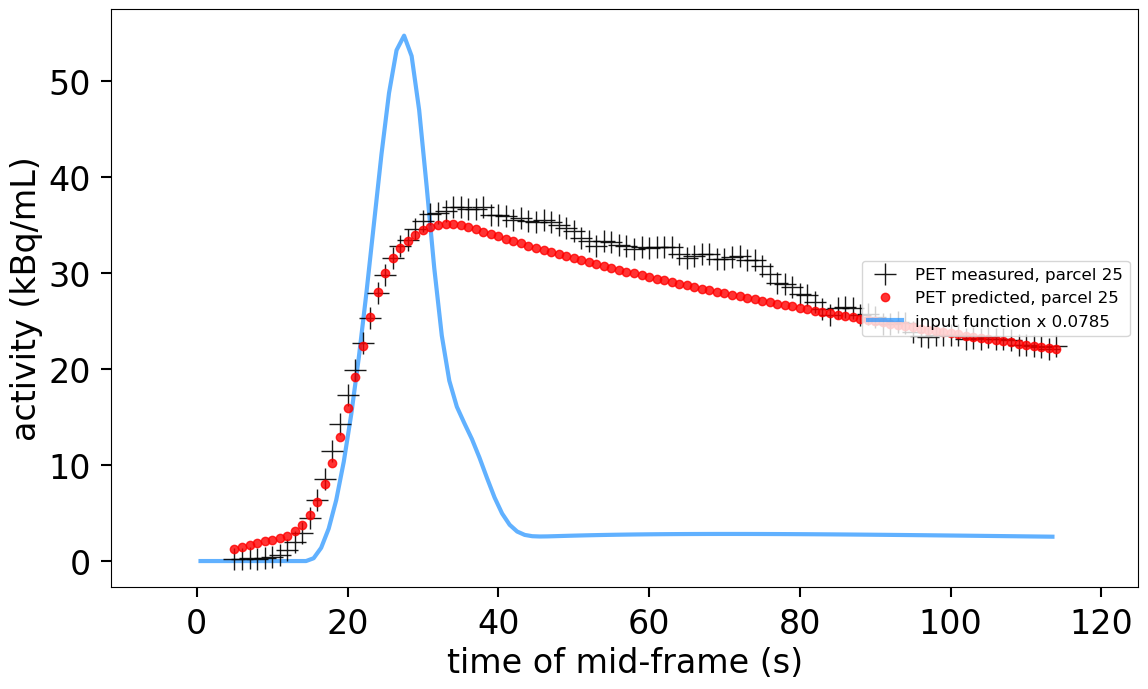

In [4]:
mm_twil.plotting.truths_plot(truths=truth_twil, parc_index=parc_index)

Let's sample from this distribution using the default `dynesty` settings with `'slice'`.

In [5]:
# de novo, thalamus ~ 6, 25
res_twil = mm_twil.solver.run_nested(print_progress=True, parc_index=range(10))

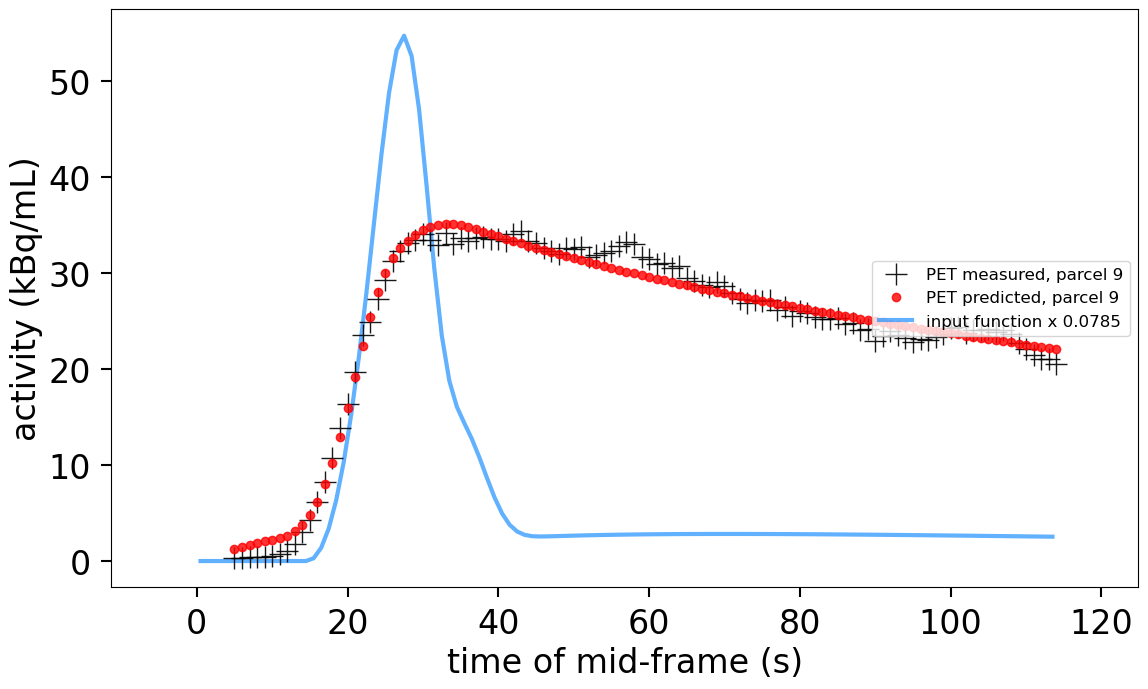

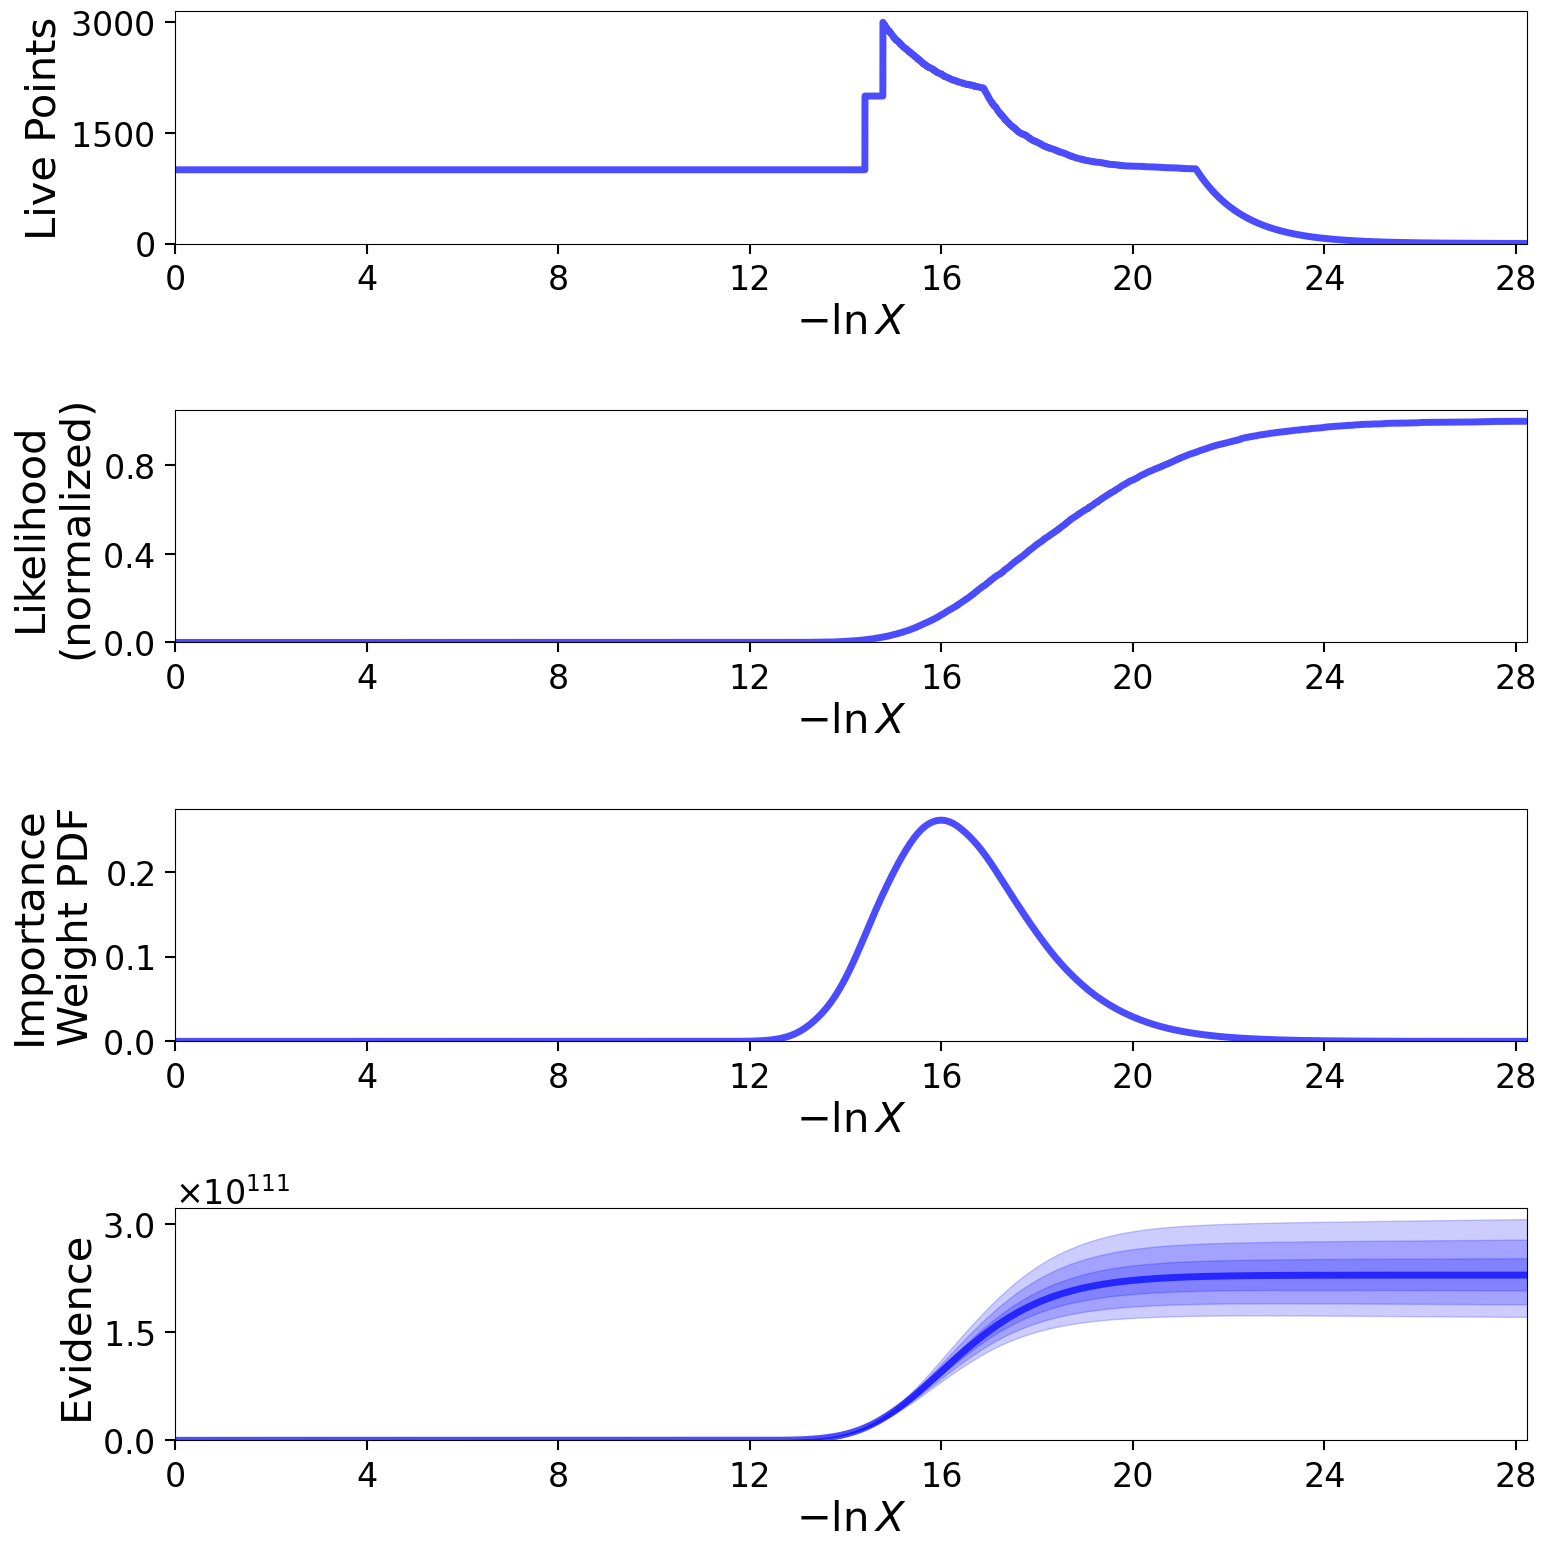

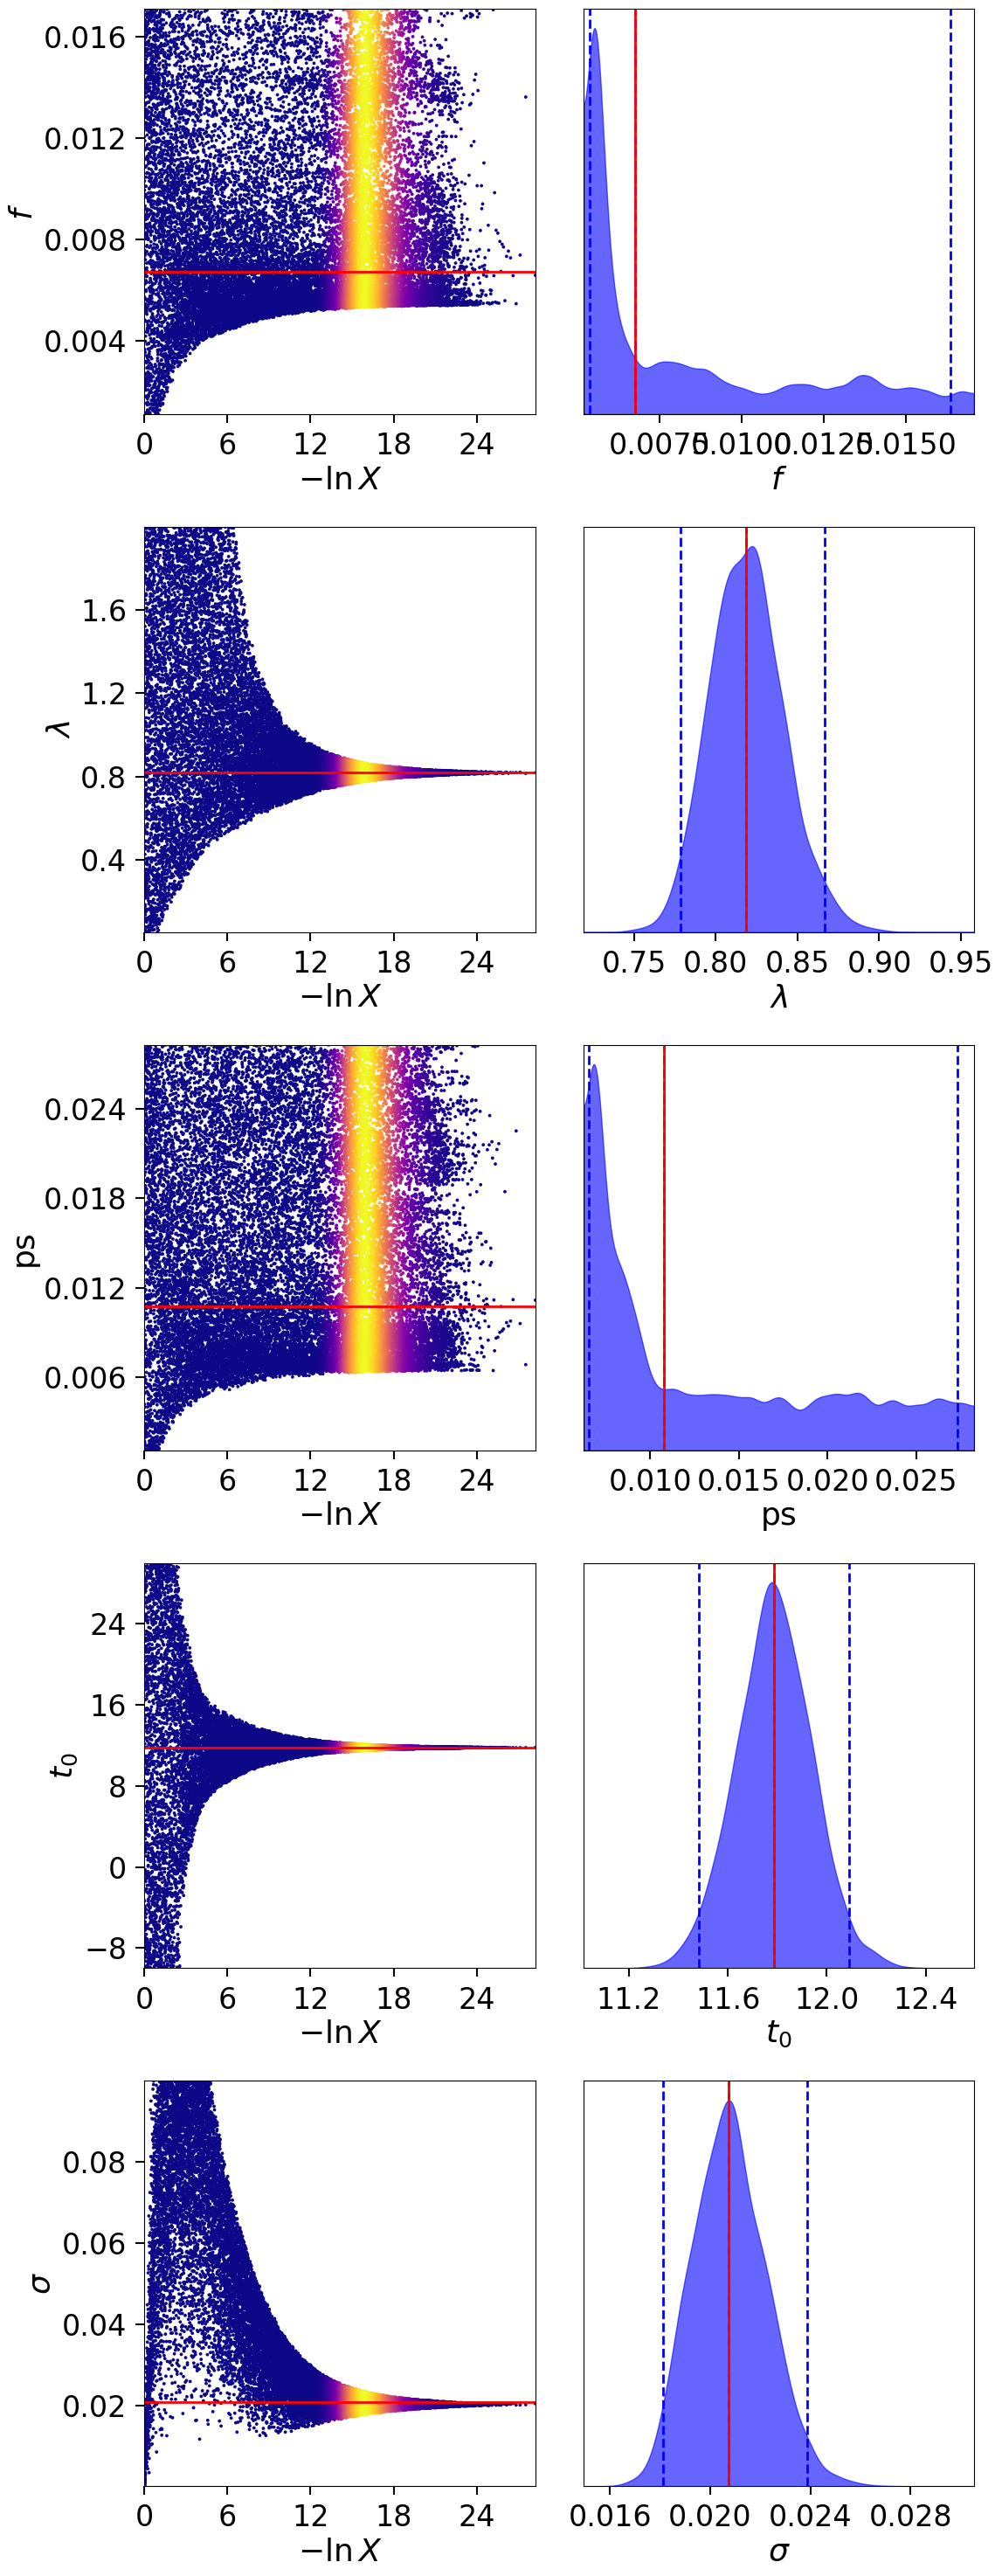

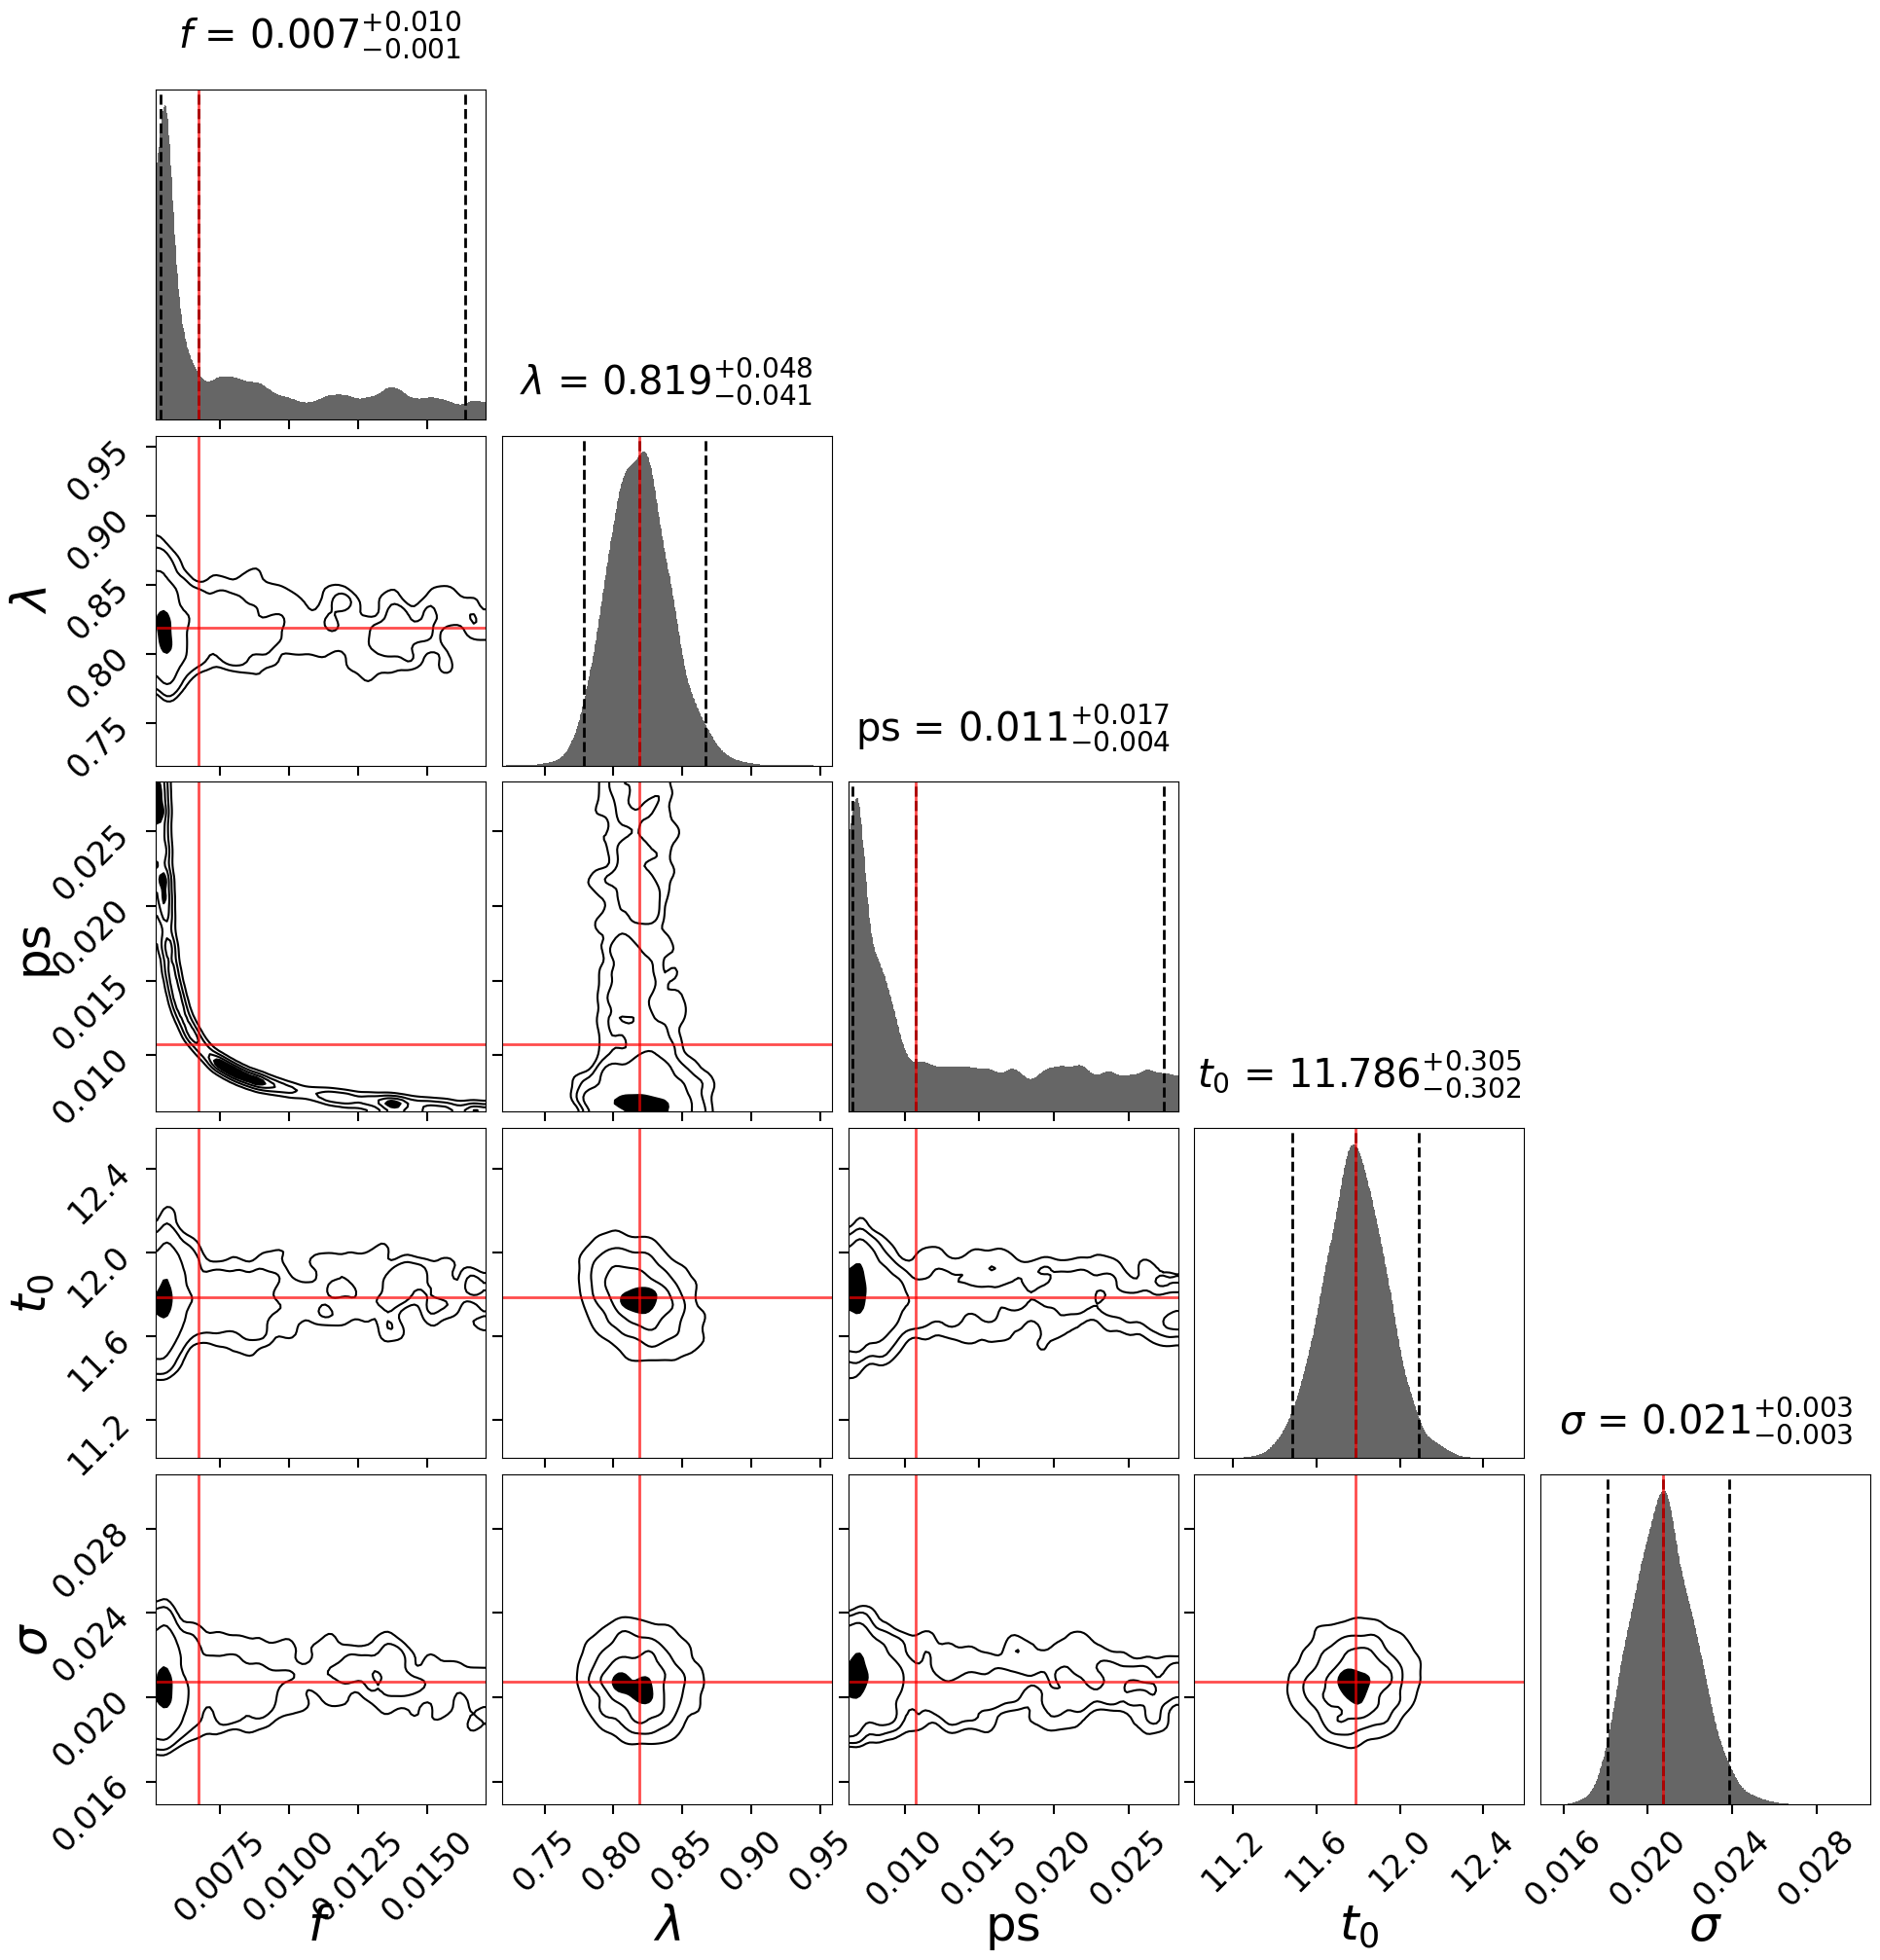

In [6]:
mm_twil.plotting.results_plot(tag="playground_Raichle1983_twil", parc_index=9)

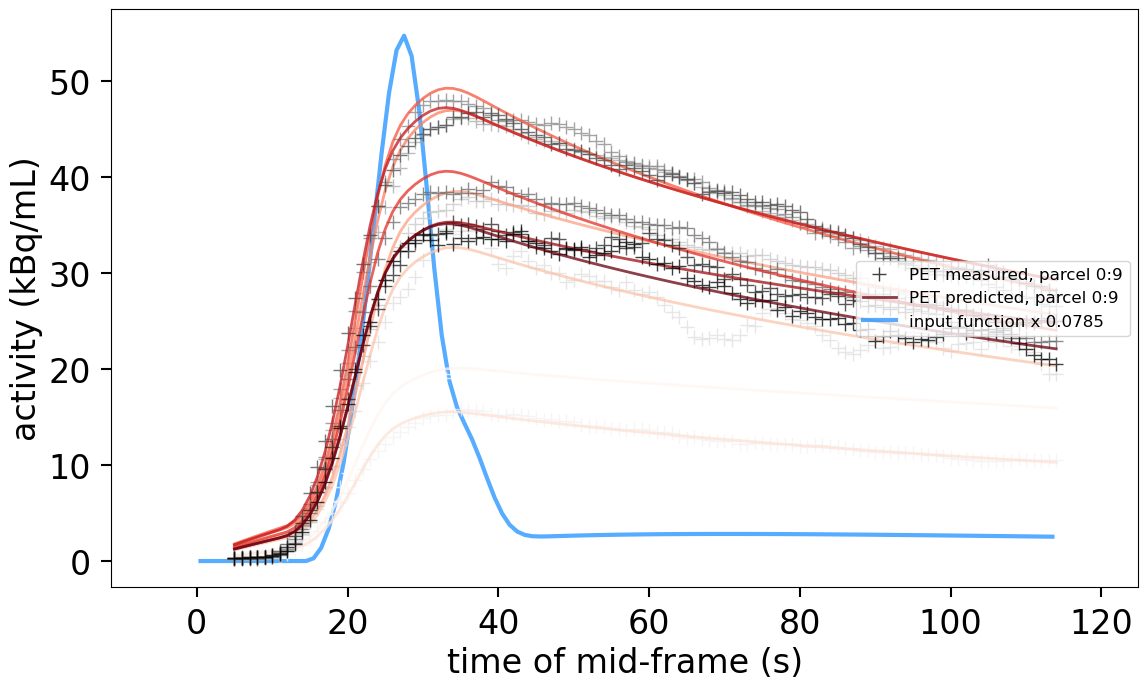

In [7]:
mm_twil.plotting.parcs_plot()

## Inspect Raichle1983Context idif

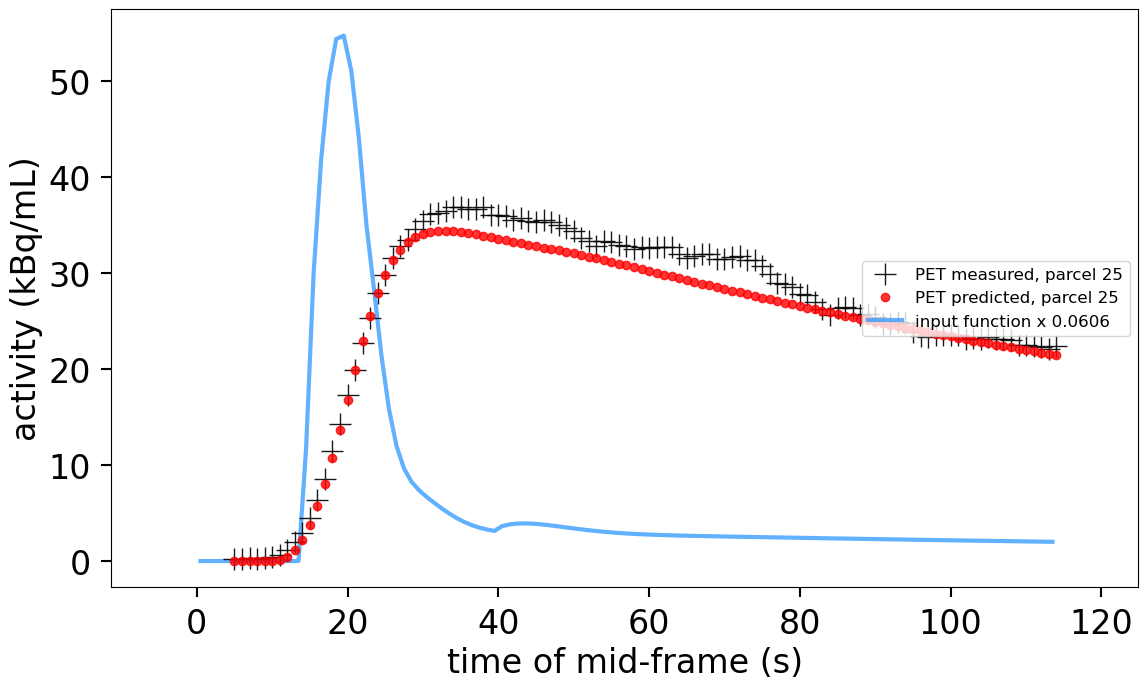

In [8]:
mm_idif.plotting.truths_plot(truths=truth_idif, parc_index=parc_index)

Let's sample from this distribution using the default `dynesty` settings with `'slice'`.

In [9]:
# de novo, thalamus ~ 6, 25
res_idif = mm_idif.solver.run_nested(print_progress=True, parc_index=range(10))

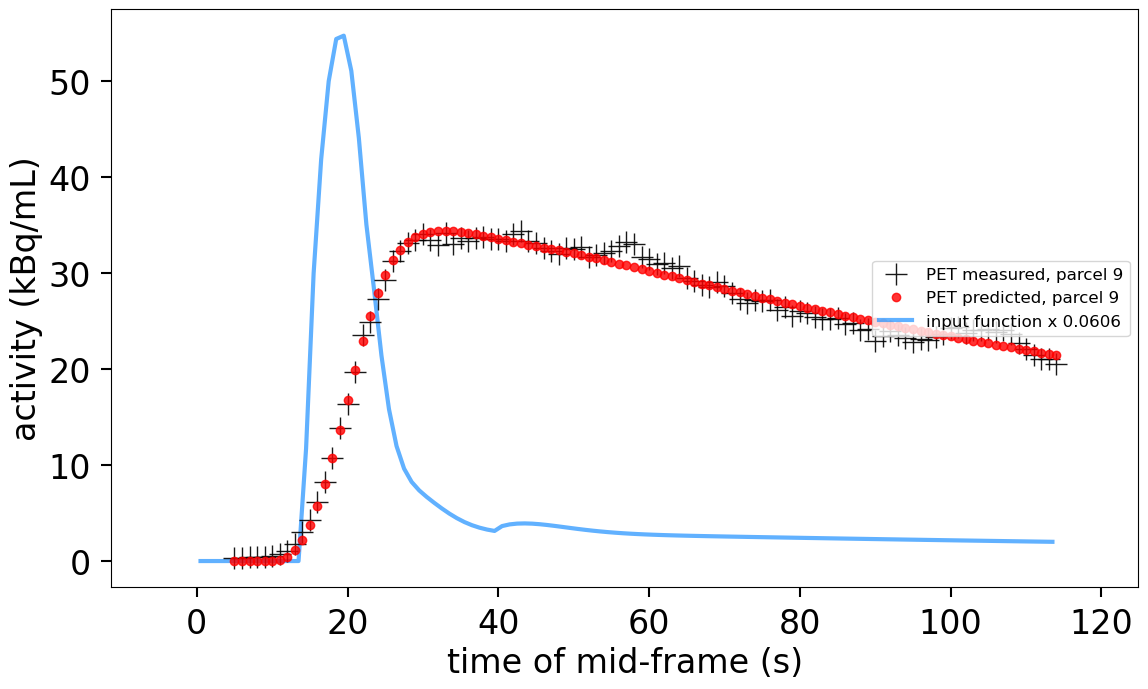

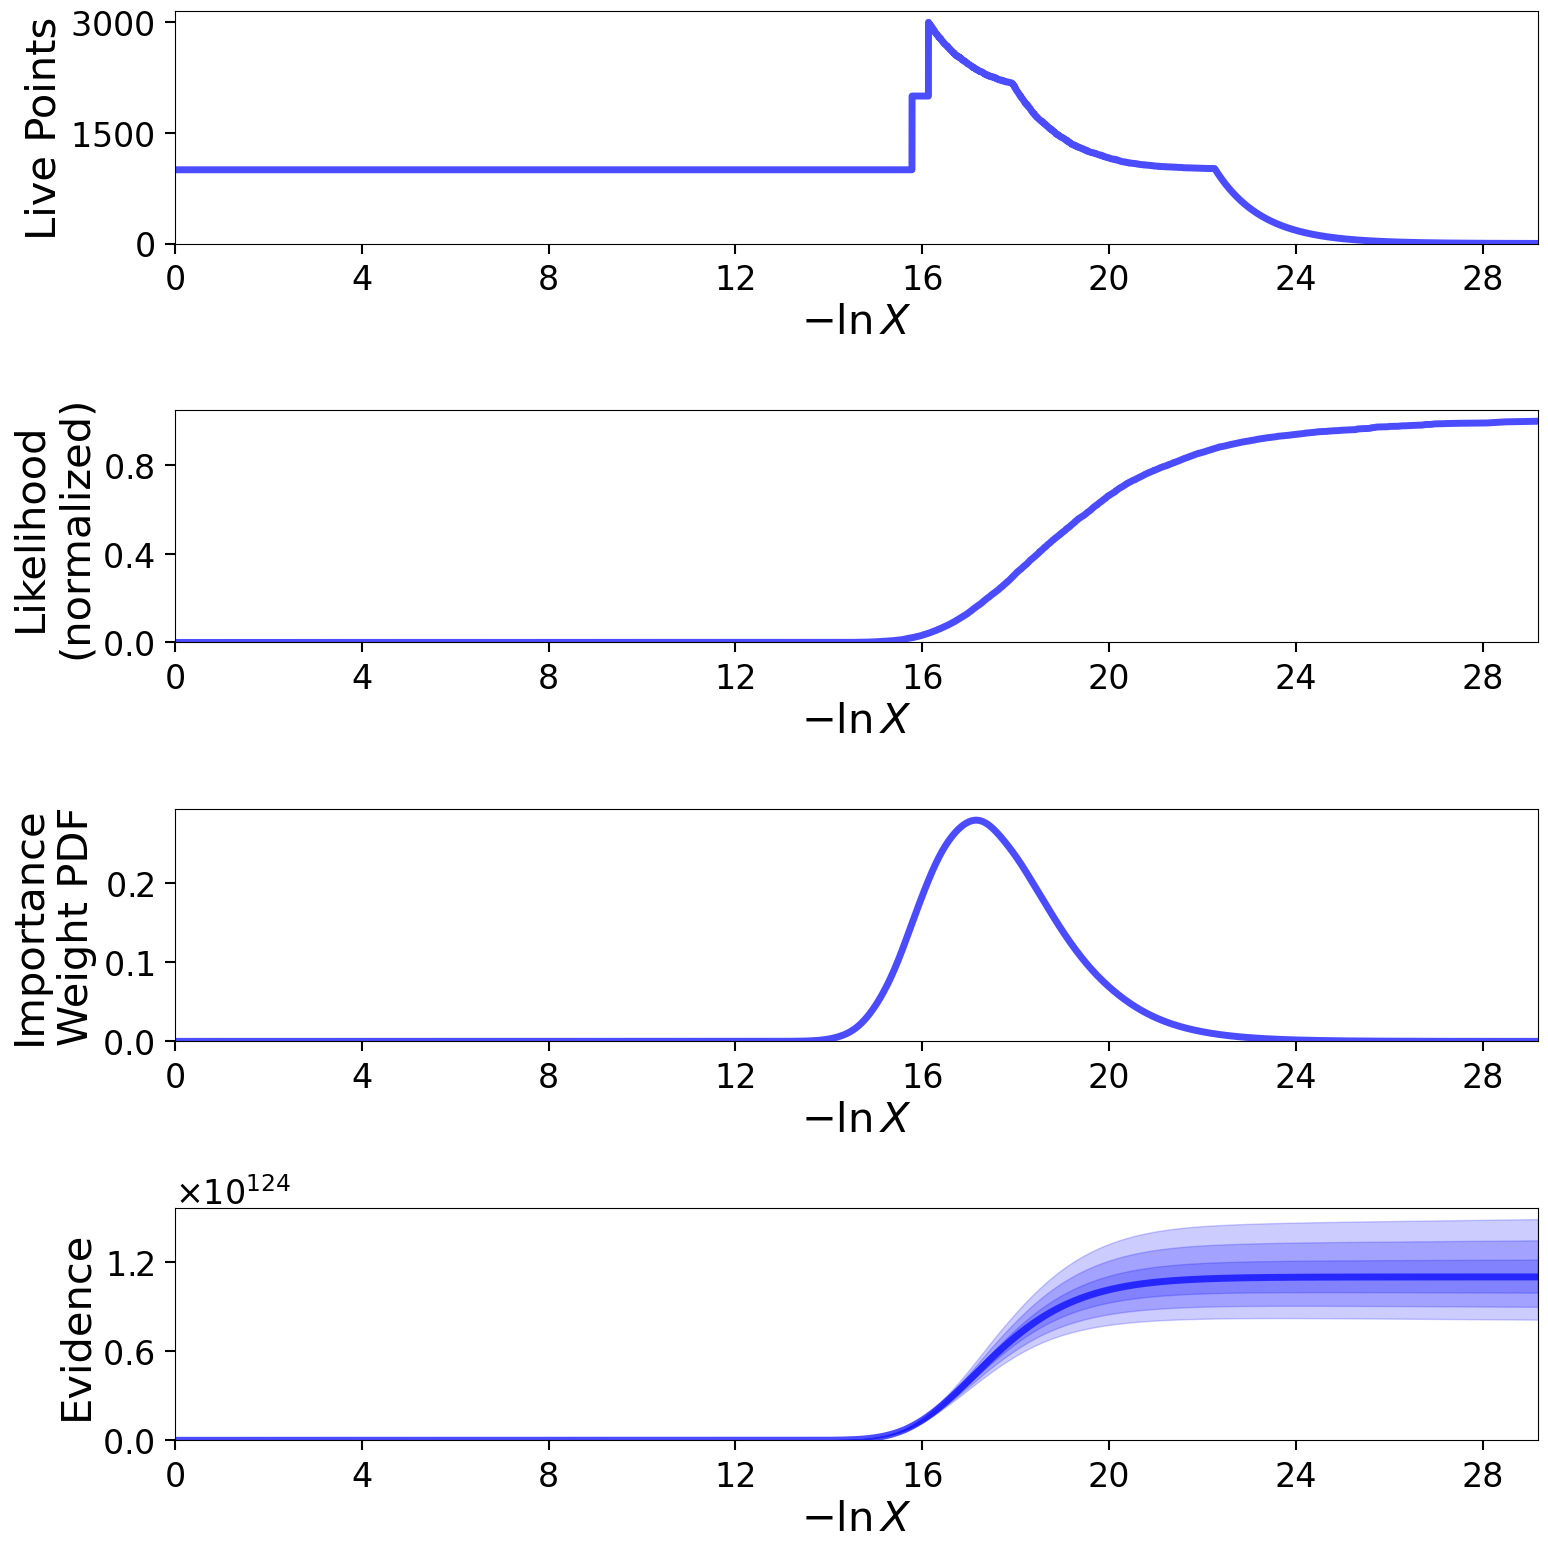

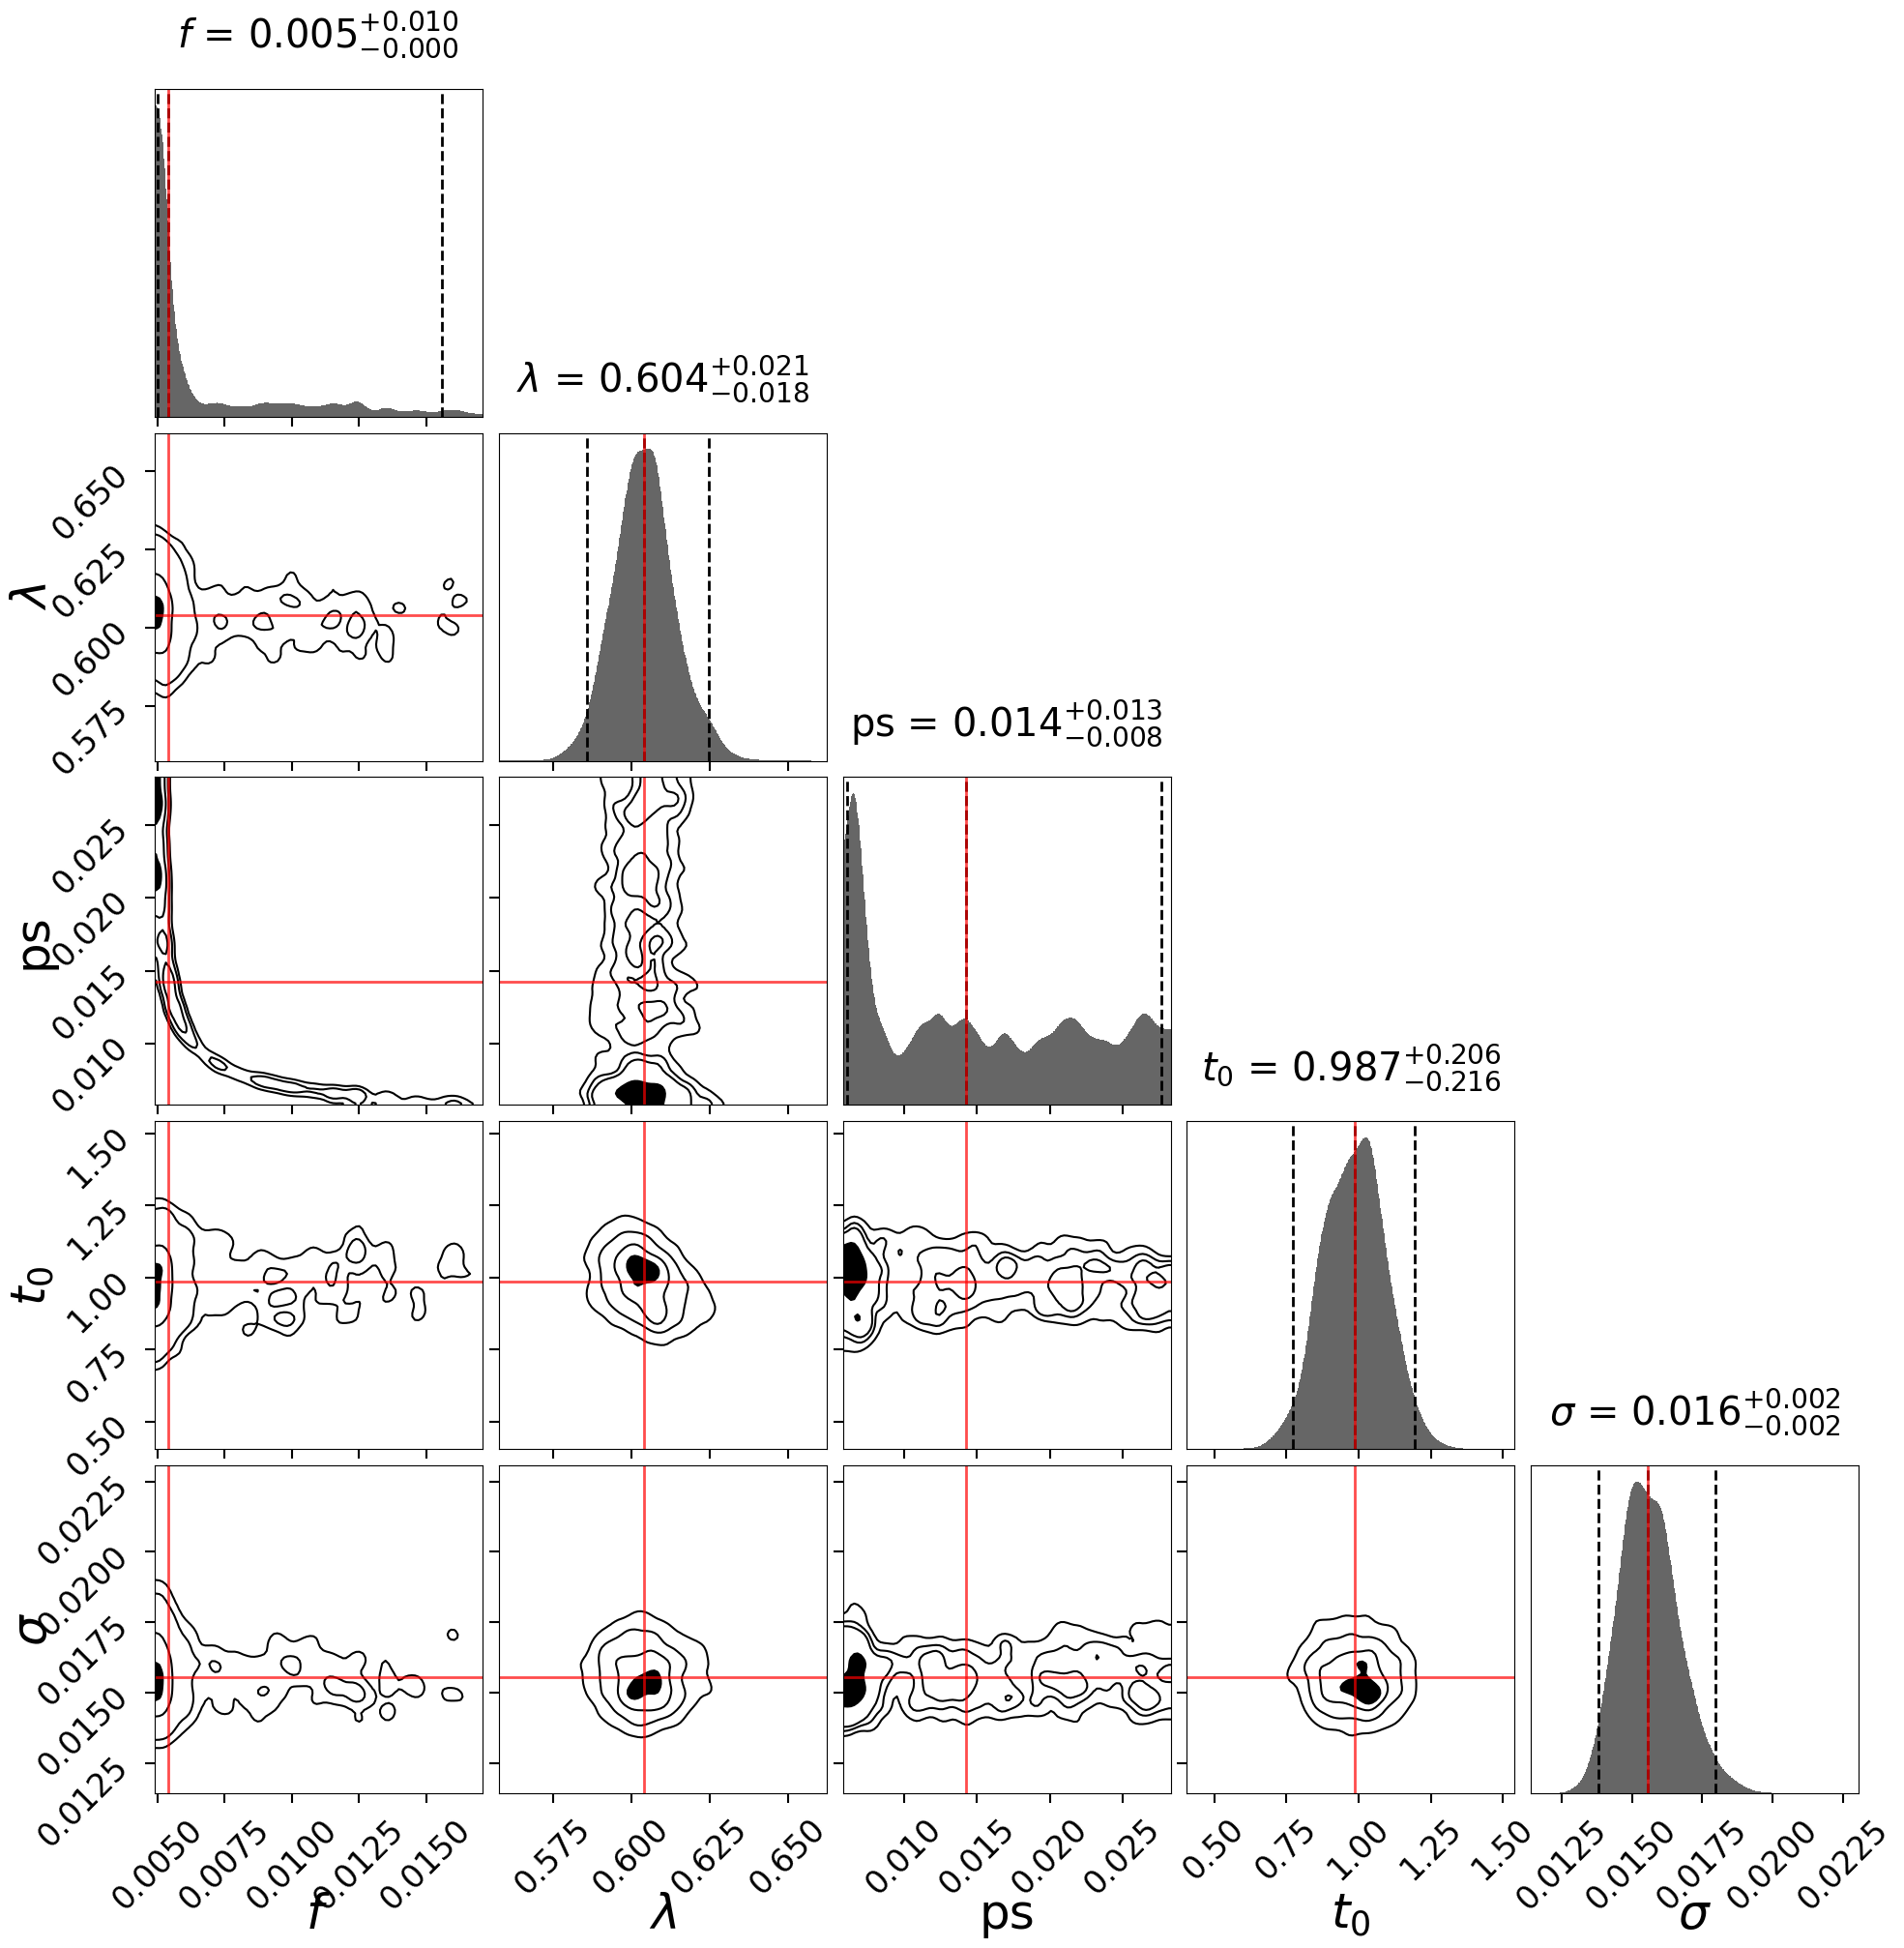

In [10]:
mm_idif.plotting.results_plot(tag="playground_Raichle1983_idif", parc_index=9)

In [11]:
mm_idif.plotting.parcs_plot()

In [12]:
mm_twil.data.print_truths()
mm_idif.data.print_truths()



=============================== Truths ===============================
Parameter                        Value
----------------------------------------

Row 0:
$f$                            0.00414
$\lambda$                      1.12549
ps                             0.00507
$t_0$                         12.05323
$\sigma$                       0.00963

Row 1:
$f$                            0.00253
$\lambda$                      0.41253
ps                             0.00671
$t_0$                         12.00307
$\sigma$                       0.00624

Row 2:
$f$                            0.00613
$\lambda$                      0.73866
ps                             0.01044
$t_0$                         12.59405
$\sigma$                       0.02461

Row 3:
$f$                            0.00680
$\lambda$                      1.03935
ps                             0.01322
$t_0$                         12.84261
$\sigma$                       0.01939

Row 4:
$f$                        

In [13]:
pprint(mm_twil.solver.truths)
pprint(mm_idif.solver.truths)

array([[4.14291399e-03, 1.12548947e+00, 5.06921217e-03, 1.20532285e+01,
        9.63427069e-03],
       [2.52731146e-03, 4.12534746e-01, 6.70765800e-03, 1.20030730e+01,
        6.24421155e-03],
       [6.12646763e-03, 7.38655641e-01, 1.04387685e-02, 1.25940535e+01,
        2.46076380e-02],
       [6.79574418e-03, 1.03934968e+00, 1.32179962e-02, 1.28426104e+01,
        1.93877861e-02],
       [8.67229705e-03, 1.06894258e+00, 1.53552307e-02, 1.23930427e+01,
        1.98156485e-02],
       [1.01767571e-02, 9.27880251e-01, 1.43119193e-02, 1.22966380e+01,
        2.24386495e-02],
       [8.06765794e-03, 8.22435219e-01, 1.21613085e-02, 1.19756132e+01,
        2.32115941e-02],
       [9.68208142e-03, 1.06523044e+00, 1.33053713e-02, 1.15770093e+01,
        2.24924681e-02],
       [6.40522983e-03, 1.12784518e+00, 1.11047177e-02, 1.16919334e+01,
        1.88778785e-02],
       [6.73299667e-03, 8.18760821e-01, 1.07438874e-02, 1.17864186e+01,
        2.07295783e-02]])
array([[0.00276201, 0.6817191